# Иследование данных по оттоку клиентов банка

*Из «Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.*

*Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.* 

*Необходимо построить модель с предельно большим значением **F1**-меры, доведя метрику до 0.59.*

*Дополнительно необходимо измерить **AUC-ROC**, сравнив её значение с **F1**-мерой.*

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

__Цель исследования__

Построить модель, которая позволит спрогнозировать поведение клиентов банка на основе исторических данных о поведении клиентов и расторжении договоров с банком.

При этом показатель __F1-меры__ должен быть не меньше 0.59.



__Ход исследования__

Данные для исследования представлены в файле
`/datasets/Churn.csv`. О качестве данных ничего не известно, в начале потребуется обзор данных.

Затем нужно будет провести проверку баланса классов, посмотреть как работают несколько моделей машинного обучения на несбалансированных классах, выделить лучшую модель, провести балансировку и проверить модель на специально выделеной для этого тестовой выборке.

_Перед началом работы загрузим необходимые библиотеки_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve 
from sklearn.utils import shuffle

## Подготовка данных

### Обзор данных

Для знакомства с данными откроем файл и выведем:
    
1. Первые 20 строк таблицы

2. Общую информацию по таблице

3. Гистограммы для всех числовых столбцов таблицы

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Представлены данные о поведении клиентов банка.
При этом предоставлена следующая информация о данных

__Признаки__
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата


__Целевой признак__
* Exited — факт ухода клиента

Таблица состоит из 10 тыс строк в 14 столбцах. Ряд столбцов не потребуется для построения модели (индекс, уникальный идентификатор, фамилия) и будут убраны после проверки данных на дубликаты. Типы данных определены верно. Названия столбцов необходимо привести к стандартному формату.


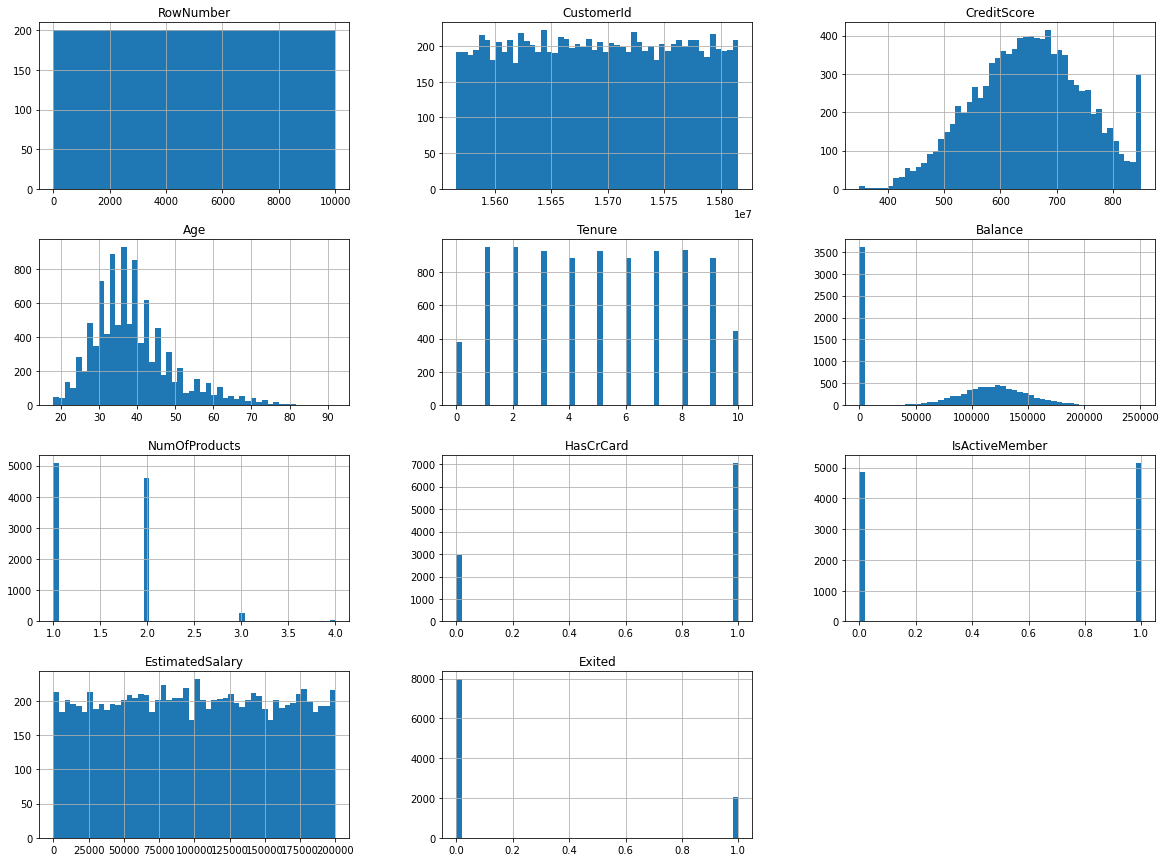

In [5]:
df.hist(bins=50, figsize=(20,15));

__Вывод:__ Для иследования предоставлены данные по клиентам банка с целевым показателем ухода. Целевой показатель распределен неравномерно, что потребует его балансировки для настройки модели. 

### Предобрабокта данных

Первым шагом приведем все названия столбцов к единому формату

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df = df.rename(
    columns = {'rownumber': 'row_number', 
               'customerid': 'customer_id',
               'creditscore': 'credit_score',
               'numofproducts': 'num_of_products',
               'hascrcard': 'has_cr_card',
               'isactivemember': 'is_active_member',
               'estimatedsalary': 'estimated_salary',}
)

In [8]:
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Теперь проверим количество пропусков в датасете.

In [9]:
df.isna().sum()

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [10]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
row_number,0.000000
customer_id,0.000000
surname,0.000000
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.000000
balance,0.000000
num_of_products,0.000000


Пропуски пристутствую только в столбце __tenure__. Это столбец, который показывает количество лет, в течение которых человек является клиентом банка. Отсутствие данных может быть вызвано техническим сбоем. Заполним пропуски медианой.

In [11]:
df.tenure = df.tenure.fillna(df['tenure'].median())

In [12]:
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Проведем проверку на явные дубликаты.

In [13]:
df.duplicated().sum()

0

Совпадающие строки отсутствуют.

Проведем еще проверку, исключив колонки __row_number__ и __customer_id__

In [14]:
df.drop(['row_number', 'customer_id'], axis=1).duplicated().sum()

0

Дубликатов также не обнаружено.
Однако при проверке по фамилиям клиентов:

In [15]:
df['surname'].duplicated().sum()

7068

В банке обязательно будут однофамильцы и члены одной семьи, поэтому сделаем еще одну проверку с учетом пола и возраста:

In [16]:
df[['surname', 'gender', 'age']].duplicated().sum()

596

Посмотрим на эти дубликаты внимательнее:

In [17]:
doubles = df[['surname', 'gender', 'age']].duplicated(keep=False)
df[doubles].sort_values('surname').head(20)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
3466,3467,15631339,Adams,791,France,Male,28,4.0,0.00,1,1,0,174435.48,0
8926,8927,15709136,Adams,620,France,Male,28,8.0,0.00,2,1,1,199909.32,0
8980,8981,15786433,Aitken,650,Germany,Female,35,3.0,165982.43,2,1,1,24482.16,0
8297,8298,15664681,Aitken,584,France,Female,35,2.0,114321.28,2,0,0,15959.01,0
8825,8826,15797081,Ajuluchukwu,611,Germany,Female,49,9.0,115488.52,2,1,1,138656.81,1
9783,9784,15680430,Ajuluchukwu,601,Germany,Female,49,4.0,96252.98,2,1,0,104263.82,0
5502,5503,15815690,Akabueze,614,Spain,Female,40,5.0,113348.50,1,1,1,77789.01,0
7398,7399,15577771,Akabueze,453,Germany,Female,40,5.0,111524.49,1,1,1,120373.84,1
1050,1051,15623828,Akobundu,682,France,Male,30,4.0,0.00,1,0,1,161465.31,0
9772,9773,15750549,Akobundu,660,Germany,Male,30,1.0,84440.10,2,1,1,60485.98,0


В связи с отличающимися данными в других столбцах (кредитная история, срок взаимодействия с банком, баланс и т.д.) можно предположить, что представленные дубликаты - это однофамильцы, а не задвоившиеся данные и оставить их в датасете.

Завершим подготовку данных, удалив столбцы датасета, которые не потребуются нам для работы модели.
Удалим __row_number, customer_id, surname__.

In [18]:
df = df.drop(['row_number', 'customer_id', 'surname'], axis=1)

__Вывод:__ при предобработке данных были внесены следующие изменения в датасет:
* преобразованы заголовки столбцов
* обработаны пропуски
* подтверждено отсутствие дубликатов
* удалены ненужные для дальнейшего исследования столбцы

## Исследование задачи

### Баланс классов

Исследуем баланс целевого признака:

0    0.7963
1    0.2037
Name: exited, dtype: float64

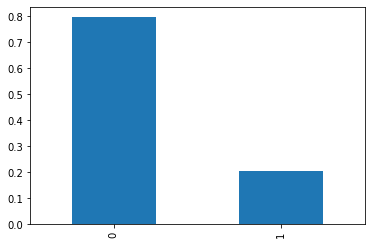

In [19]:
class_frequency = df['exited'].value_counts(normalize=True)
display(class_frequency)
class_frequency.plot(kind='bar');

В датасете почти 80% клиентов продолжают оставаться клиентами банка, т.е. наблюдается явный дисбаланс. Для начала посмотрим, как будут вести себя различные модели при несбалансированных классах.

### Разделение на выборки

Для работы потребуется разбить данные на три выборки: тренировочную (60%), валидационную (20%) и тестовую (20%).

In [20]:
df_train, df_valtest = train_test_split(df, test_size=0.4, random_state=12345)
df_valid, df_test = train_test_split(df_valtest, test_size=0.5, random_state=12345)

features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

Убедимся, что выборки проведены корректно:

In [21]:
display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(6000, 10)

(2000, 10)

(2000, 10)

In [22]:
display(target_train.shape)
display(target_valid.shape)
display(target_test.shape)

(6000,)

(2000,)

(2000,)

### Кодировка

Закодируем данные через прямое кодирование.

In [23]:
features_train= pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

display(features_train.shape)
display(features_valid.shape)
display(features_test.shape)

(6000, 11)

(2000, 11)

(2000, 11)

Проверим, что во всех трех выборках произошли одинаковые изменения в столбцах __geography__ и __gender__

In [24]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,567,35,8.0,153137.74,1,1,0,88659.07,0,1,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,0,1
1247,512,24,6.0,0.00,2,1,0,37654.31,0,0,1
3716,665,27,2.0,147435.96,1,0,0,187508.06,1,0,0


In [25]:
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,585,35,2.0,0.00,2,1,0,98621.04,0,0,0
5799,625,45,3.0,0.00,1,1,1,184474.15,0,0,0
5511,667,32,0.0,103846.65,1,1,0,20560.69,1,0,1
7365,568,36,10.0,153610.61,1,1,1,54083.80,0,1,0
7367,606,42,10.0,0.00,2,1,0,177938.52,0,1,1


In [26]:
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,438,38,2.0,0.00,2,1,0,136859.55,0,0,1
5709,644,39,9.0,0.00,1,1,0,3740.93,0,0,0
7117,564,31,5.0,121461.87,1,1,1,20432.09,0,1,1
7775,628,40,10.0,0.00,2,1,0,103832.58,0,1,1
8735,728,30,10.0,114835.43,1,0,1,37662.49,0,0,1


### Модели с дисбалансом классов

Проведем исследования на трех моделях:
* логистическая регрессия
* решающее дерево
* случайный лес


#### Логистическая регрессия

In [27]:
%%time

model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)
predicted_valid_lr = model_lr.predict(features_valid)
accuracy_lr = model_lr.score(features_valid, target_valid)
f1_lr = f1_score(target_valid, predicted_valid_lr)
print ('Accuracy of disballanced logistic regression model:', accuracy_lr)
print('F1 of disballanced logistic regression model:', f1_lr)

Accuracy of disballanced logistic regression model: 0.7815
F1 of disballanced logistic regression model: 0.08385744234800838
CPU times: user 45.9 ms, sys: 17 ms, total: 62.9 ms
Wall time: 33.1 ms


#### Решающее дерево

Сначала определим лучшую глубину дерева для наших данных

In [28]:
%%time
best_result = 0
best_depth = 0
best_f1 = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_depth = depth
        best_result = result

print('Accuracy of best model:', best_result)
print('Depth of best model:', best_depth)

Accuracy of best model: 0.858
Depth of best model: 6
CPU times: user 462 ms, sys: 35.4 ms, total: 497 ms
Wall time: 562 ms


После этого обучим модель и посмотрим значение F1-меры на несбалансированных данных:

In [29]:
%%time

model_dt =  DecisionTreeClassifier(random_state = 12345, max_depth = 6)

model_dt.fit(features_train, target_train)
predicted_valid_tree = model_dt.predict(features_valid)
accuracy_dt = model_dt.score(features_valid, target_valid)
f1_dt = f1_score(target_valid, predicted_valid_tree)

print ('Accuracy of disballanced decision tree model:', accuracy_dt)
print('F1 of disballanced decision tree model:', f1_dt)

Accuracy of disballanced decision tree model: 0.858
F1 of disballanced decision tree model: 0.5696969696969697
CPU times: user 21.1 ms, sys: 3.53 ms, total: 24.6 ms
Wall time: 28.6 ms


#### Случайный лес

Определим количество деревьев и лучшую глубину дерева для наших данных:

In [30]:
%%time

best_result = 0
best_est = 0
best_depth = 0
for est in range(20, 120, 10):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_est = est
            best_model = model
            best_result = result
            best_depth = depth
print('Accuracy of best model:', best_result)
print('EST of best model:', best_est)
print('Depth of best model:', best_depth)

Accuracy of best model: 0.865
EST of best model: 60
Depth of best model: 8
CPU times: user 28.6 s, sys: 234 ms, total: 28.8 s
Wall time: 28.9 s


После этого обучим модель и посмотрим значение F1-меры на несбалансированных данных:

In [31]:
%%time

model_rf = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=8)

model_rf.fit(features_train,target_train)
predicted_valid_tree = model_rf.predict(features_valid)
accuracy_rf = model_rf.score(features_valid, target_valid)
f1_rf = f1_score(target_valid, predicted_valid_tree)

print ('Accuracy of disballanced random forest model:', accuracy_rf)
print('F1 of disballanced random forest model:', f1_rf)

Accuracy of disballanced random forest model: 0.865
F1 of disballanced random forest model: 0.5700636942675159
CPU times: user 360 ms, sys: 3.99 ms, total: 364 ms
Wall time: 369 ms


#### Проверка адекватности

Для проверки модели на адекватность сравним полученные результаты выбранной модели с константной моделью, прогнозирующей любому объекту класс "0"

In [32]:
target_pred_constant = pd.Series(0, index=range(target_valid.shape[0]))
accuracy_const = accuracy_score(target_valid, target_pred_constant)
f1_const = f1_score(target_valid, target_pred_constant)
print ('Accuracy of constant model:', accuracy_const)
print('F1 of constant model:', f1_const)

Accuracy of constant model: 0.791
F1 of constant model: 0.0


#### Итоги исследования моделей с дисбалансом классов

In [33]:
models_dis = pd.DataFrame({'model': 
                           ['log_regression', 'decision_tree', 'random_forest', 'constant'],
                           'accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_const],
                           'f1_score': [f1_lr,f1_dt,f1_rf,f1_const]
                          })
models_dis.style.highlight_max(color='yellowgreen')

,model,accuracy,f1_score
0,log_regression,0.781500,0.083857
1,decision_tree,0.858000,0.569697
2,random_forest,0.865000,0.570064
3,constant,0.791000,0.000000


Лучшей моделью стала модель случайного леса.
Поэтому с ней и будем работать в дальнейшем.

Прежде чем приступить к балансировке классов посмотрим на кривую ошибок и показатель площади под ROC-кривой:

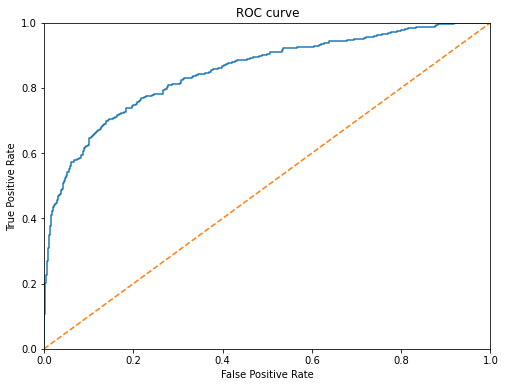

Area Under Curve ROC: 0.8509003804765332


In [34]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


print('Area Under Curve ROC:', auc_roc)

Показатель площади под ROC-кривой больше 0,5, значит модель сможет с большей вероятностью выделять истинно положительные и истинно отрицательные значения.

### Борьба с дисбалансом

Попробуем проверить, как изменятся результаты при увеличении и уменьшении выборки методами __upscale__ и __downscale__.

#### Upscaling

Увеличим выборку с заданным количеством повторений "5".

In [35]:
<div class="alert alert-success">
<h2>V2 Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Спасибо за корректировку!def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

In [36]:
%%time

best_result = 0
best_est = 0
best_depth = 0
for est in range(20, 120, 10):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled,target_upsampled)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_est = est
            best_model = model
            best_result = result
            best_depth = depth
print('Accuracy of best model:', best_result)
print('EST of best model:', best_est)
print('Depth of best model:', best_depth)

Accuracy of best model: 0.821
EST of best model: 70
Depth of best model: 11
CPU times: user 40.8 s, sys: 199 ms, total: 41 s
Wall time: 41 s


In [37]:
%%time

model_rf_u = RandomForestClassifier(random_state=12345, n_estimators=70, max_depth=11)

model_rf_u.fit(features_upsampled,target_upsampled)
predicted_valid_tree = model_rf_u.predict(features_valid)
accuracy_rf_up = model_rf_u.score(features_valid, target_valid)
f1_rf_up = f1_score(target_valid, predicted_valid_tree)

print ('Accuracy of upscaled random forest model:', accuracy_rf_up)
print('F1 of upscaled random forest model:', f1_rf_up)

Accuracy of upscaled random forest model: 0.821
F1 of upscaled random forest model: 0.6057268722466961
CPU times: user 611 ms, sys: 0 ns, total: 611 ms
Wall time: 620 ms


#### Downscaling

Уменьшим выборку с долей отрицательных объектов, которые нужно сохранить, "0.5".

In [38]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

In [39]:
%%time

best_result = 0
best_est = 0
best_depth = 0
for est in range(20, 120, 10):
    for depth in range(1,12):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled,target_downsampled)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_est = est
            best_model = model
            best_result = result
            best_depth = depth
print('Accuracy of best model:', best_result)
print('EST of best model:', best_est)
print('Depth of best model:', best_depth)

Accuracy of best model: 0.8605
EST of best model: 80
Depth of best model: 9
CPU times: user 20.8 s, sys: 120 ms, total: 21 s
Wall time: 21 s


In [40]:
%%time

model_rf_d = RandomForestClassifier(random_state=12345, n_estimators=80, max_depth=9)

model_rf_d.fit(features_downsampled,target_downsampled)
predicted_valid_tree = model_rf_d.predict(features_valid)
accuracy_rf_down = model_rf_d.score(features_valid, target_valid)
f1_rf_down = f1_score(target_valid, predicted_valid_tree)

print ('Accuracy of downscaled random forest model:', accuracy_rf_down)
print('F1 of downscaled random forest model:', f1_rf_down)

Accuracy of downscaled random forest model: 0.8605
F1 of downscaled random forest model: 0.6454891994917408
CPU times: user 329 ms, sys: 0 ns, total: 329 ms
Wall time: 335 ms


#### Итоги балансировки

In [41]:
models_bal = pd.DataFrame({'random_forest': 
                           ['upscaled', 'downscaled', 'unballanced'],
                           'accuracy': [accuracy_rf_up, accuracy_rf_down, accuracy_rf],
                           'f1_score': [f1_rf_up,f1_rf_down,f1_rf]
                          })
models_bal.style.highlight_max(color='yellowgreen')

,random_forest,accuracy,f1_score
0,upscaled,0.821000,0.605727
1,downscaled,0.860500,0.645489
2,unballanced,0.865000,0.570064


Из таблицы видно, что лучшие результаты __f1-score__ получаюся при уменьшении выборки: небольшое сснижение параметра __accuracy__ при довольно значительном росте параметра __F1-score__.

Проверим как изменился __показатель площади под ROC-кривой___

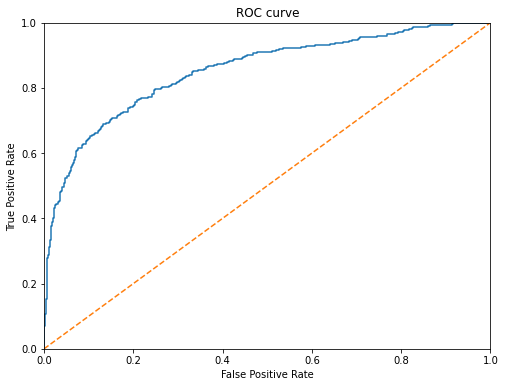

Area Under Curve ROC: 0.8520693326235943


In [42]:
probabilities_valid = model_rf_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


print('Area Under Curve ROC:', auc_roc)

Показатель вырос, но незначительно (на две тысячных).

__Вывод:__ для проверки на тестовых данных будем использовать модель случайного леса с количеством деревьев 80 и глубиной 9 с данными, сбалансироваными методом __downscale__ с долей отрицательных объектов, которые нужно сохранить, "0.5"

## Тестирование модели

Проведем финальную проверку выбранной модели на заранее выделенных тестовых данных

In [43]:
model_rf_d = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=8)

model_rf_d.fit(features_downsampled,target_downsampled)
predicted_test = model_rf_d.predict(features_test)
accuracy_test = model_rf_d.score(features_test, target_test)
f1_test = f1_score(target_test, predicted_test)

print ('Accuracy on test data:', accuracy_test)
print('F1 on test data:', f1_test)

Accuracy on test data: 0.846
F1 on test data: 0.6020671834625323


Показатели __accuracy__ и __F1-мера__ уменьшились, но в допустимых пределах.
Показатель __F1-мера__ на тестовых данных составил 0.60, что немного превышает целевую задачу исследования.

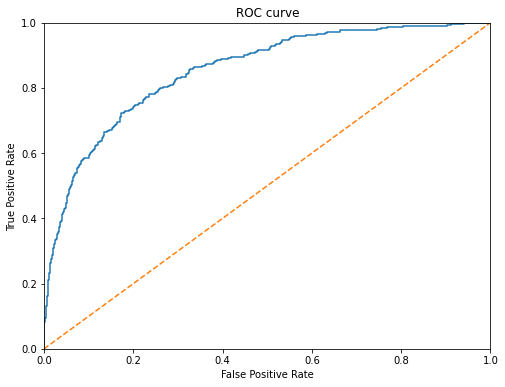

Area Under Curve ROC: 0.8531670541816387


In [44]:
probabilities_test = model_rf_d.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)


fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


print('Area Under Curve ROC:', auc_roc)

Показатель __AUC-ROC__ на тестовых данных также фактически остался прежним (увеличение на 1 тысячную).

## Общие итоги

В рамках исследования поведения клиентов банка были получены данные о клиентах.

Была проведена предобработка данных: они были приведены к стандартному формату, проверены на пропуски, дубликаты. Также были удалены те данные, которые не потребуются для обучения модели.

Было исследовано поведение трех моделей на несбалансированных данных (логистическая регрессия, решающее дерево и случайный лес) и выделена лучшая модель с лучшими гиперпараметрами (случайный лес):

In [45]:
models_dis.style.highlight_max(color='yellowgreen')

,model,accuracy,f1_score
0,log_regression,0.781500,0.083857
1,decision_tree,0.858000,0.569697
2,random_forest,0.865000,0.570064
3,constant,0.791000,0.000000


Затем был проведена балансировка классов в двух вариантах - за счет увеличения и уменьшения выборки - и определено, какой из вариантов лучше подходит для обучения модели (уменьшение выборки):

In [46]:
models_bal.style.highlight_max(color='yellowgreen')

,random_forest,accuracy,f1_score
0,upscaled,0.821000,0.605727
1,downscaled,0.860500,0.645489
2,unballanced,0.865000,0.570064


В данном случае балансировка классов не привела к улучшению результатов. Лучший результат __F1-меры__ достигнут на несбалансированной модели случайного леса: 0.57

Проверка работы модели на тестовой выборке показала, что на тестовых данных показатель __F1-меры__ равняется 0.60